In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [7]:
# input file 
calib_datafile = "calibrators.dat"
# output files
output_table = "table_calibrators.tex"
output_figure = "fig_calibrators.pdf"

In [8]:
# calibrators
calib_readin = np.genfromtxt(calib_datafile, dtype=None, 
                             names="SN,mag,magerr,mu,muerr,absM,absMerr,ebv,dm15,host,hostmorph"
                                   + ",morph,mwaj,kcorr,ref,sample")

calib_unc = calib_readin["absMerr"]
calib_data = calib_readin["absM"]
calib_SN = np.char.decode(calib_readin["SN"])
calib_host = np.char.decode(calib_readin["host"])
calib_mu = calib_readin["mu"]
calib_muerr = calib_readin["muerr"]
calib_mag = calib_readin["mag"]
calib_magerr = calib_readin["magerr"]
calib_kcorr = calib_readin["kcorr"]
calib_ref = np.char.decode(calib_readin["ref"])
calib_sample = np.char.decode(calib_readin["sample"])
calib_mwaj = calib_readin["mwaj"]
ncalib = len(calib_data)

# sanity checks of the file
testabsM = calib_readin["mag"] - calib_readin["mu"]
testerr = np.sqrt(calib_readin["magerr"]**2 + calib_readin["muerr"]**2) 
if np.max(np.abs(testabsM-calib_data)) > 1e-10:
    print("calibrator absolute magnitude doesn't match calculated value?!")
if np.max(np.abs(testerr-calib_unc)) > 5e-4:
    print("calibrator absolute magnitude uncertainty doesn't match calculated value?!")
# no output if things are okay

calib_wtmean, sumweights = np.average(calib_data,weights=calib_unc**(-2),returned=True)
calib_wterr = sumweights**(-0.5)

cpull = (calib_data - calib_wtmean)/calib_unc
cchisq = np.sum(cpull**2)
sigcalib = np.std(calib_data)

print("ncalib: {:d}".format(ncalib))
print("dispersion (stddev of residuals): {:.3f} mag".format(sigcalib))
print("chisq/dof: {:.1f}/{:d}".format(cchisq,ncalib-1))
print("weighted average (no intrinsic scatter): {:.3f} +/- {:.3f}".format(calib_wtmean,calib_wterr))

ncalib: 9
dispersion (stddev of residuals): 0.160 mag
chisq/dof: 55.2/8
weighted average (no intrinsic scatter): -18.524 +/- 0.021


In [9]:
with open(output_table,"w") as f:
    f.write("% " + output_table + " created at UT {:%Y-%m-%d %H:%M:%S}".format(datetime.datetime.utcnow())+'\n')
    f.write(r"\begin{tabular}{|c|c|cc|cc|cc|c|c|c|}"+'\n')
    f.write(r"\hline"+'\n')
    f.write(r"Supernova & Host Galaxy & $m_J$ & $\sigma_{\rm fit}$ & "+'\n')
    f.write(r" $\mu_{\rm Ceph}$ & $\sigma_{\rm Ceph}$  & "+'\n')
    f.write(r" $M_J$ & $\sigma_M$  & MW $A_J$ & $K_J$ & SN $J$-band   \\"+'\n')
    f.write(r" & & (mag) & (mag) & (mag) & (mag) & (mag) & (mag) & (mag) & (mag) & Photometry Reference \\"+'\n')
    f.write(r"\hline"+'\n')

    for i in range(ncalib):
        if calib_sample[i] == "other":
            sampstr = ""
        else:
            sampstr = "; " + calib_sample[i]
        f.write(r"{:9s} & {:9s} ".format(calib_SN[i].replace("SN","SN "),calib_host[i].replace("GC","GC ")) +
              r"& {:6.3f} & {:5.3f} ".format(calib_mag[i],calib_magerr[i]) + 
              r"& {:6.3f} & {:5.3f} ".format(calib_mu[i],calib_muerr[i]) + 
              r"& ${:7.3f}$ & {:5.3f} ".format(calib_data[i],calib_unc[i]) + 
              r"& {:5.3f} ".format(calib_mwaj[i]) +
              r"& ${:5.3f}$ & \citet".format(calib_kcorr[i]) + "{"+
              r"{:s}".format(calib_ref[i]) + "}" + sampstr + r" \\"+'\n')
    f.write(r"\hline"+'\n')
    f.write(r"\end{tabular}"+'\n')
    
print("output done: " + output_table)

output done: table_calibrators.tex


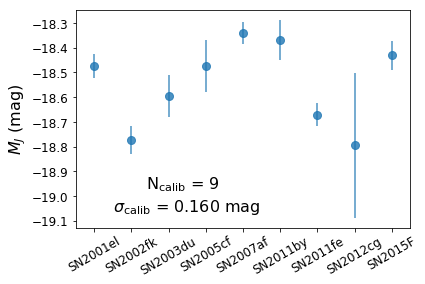

In [10]:
# plot calibrators
x = np.arange(ncalib)
figcalib = plt.figure(figsize=(6,4))
plt.errorbar(x,calib_data,yerr=calib_unc,marker='o',linestyle='none',ms=8.,alpha=0.8)
plt.xticks(x,calib_SN,rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r"$M_J$ (mag)", fontsize=16)
plt.xlim((-0.5,ncalib-0.5))
plt.text(1.4,-18.97,r"N$_\mathrm{calib}$ = " + "{:d}".format(ncalib),fontsize=16)
plt.text(0.5,-19.06,r"$\sigma_\mathrm{calib}$ = " + "{:.3f} mag".format(sigcalib),fontsize=16)
plt.savefig(output_figure,bbox_inches="tight")
plt.show()